🔗 Number of nodes: 2274
🔁 Number of fraudulent edges (transactions): 1142

🚩 Top suspicious senders:
C1305486145: 1 transactions
C840083671: 1 transactions
C1420196421: 1 transactions
C2101527076: 1 transactions
C137533655: 1 transactions


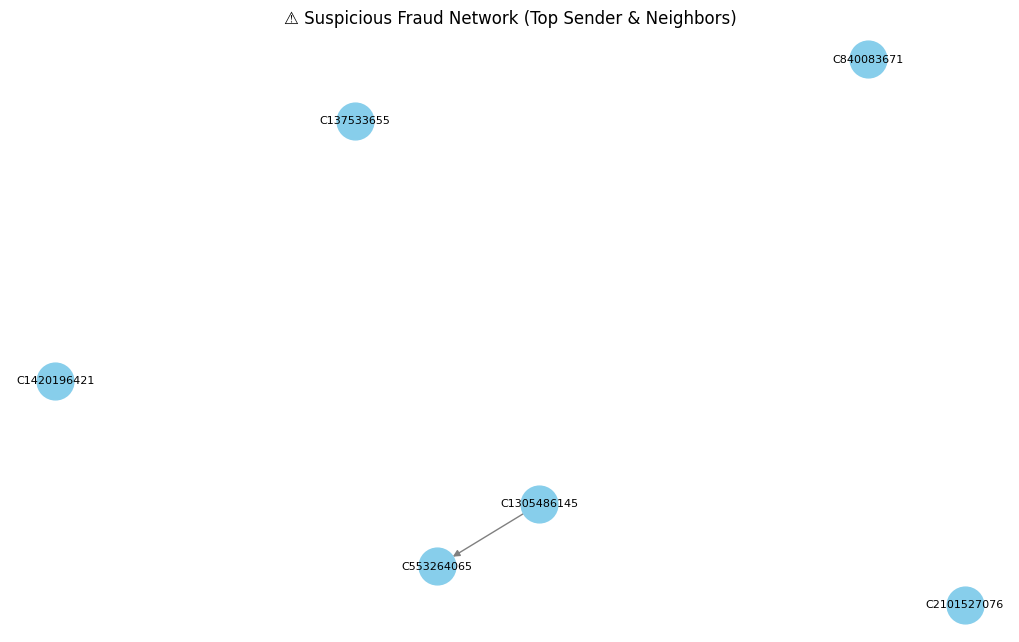

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#  Load data (replace with your cleaned path if needed)
df = pd.read_csv('C:/Users/austi/Project/Advanced-Financial-Fraud-detection/data/paysim_cleaned.csv')
# Filter for fraudulent transactions
fraud_df = df[df['isFraud'] == 1]

# Create a directed graph
G = nx.from_pandas_edgelist(
    fraud_df,
    source='nameOrig',
    target='nameDest',
    edge_attr='amount',
    create_using=nx.DiGraph()
)

#  Analyze the graph
print(f"🔗 Number of nodes: {G.number_of_nodes()}")
print(f"🔁 Number of fraudulent edges (transactions): {G.number_of_edges()}")

#  Find top suspicious nodes (most outgoing fraud transactions)
top_senders = sorted(G.out_degree, key=lambda x: x[1], reverse=True)[:5]
print("\n🚩 Top suspicious senders:")
for sender, count in top_senders:
    print(f"{sender}: {count} transactions")

# Visualize (optional)
plt.figure(figsize=(10, 6))
subgraph = G.subgraph([node for node, _ in top_senders] + list(G.successors(top_senders[0][0])))
pos = nx.spring_layout(subgraph, k=0.5)
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=700, font_size=8)
plt.title("⚠️ Suspicious Fraud Network (Top Sender & Neighbors)")
plt.show()
